# Explore here

In [1]:
# Your code here
import pandas as pd
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
total_data.shape

(768, 9)

In [3]:
total_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
print("Total missing values for each column:")
print(total_data.isnull().sum(axis=0))

Total missing values for each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
print(f"Dimensions before dropping duplicates: {total_data.shape}")

total_data = total_data.drop_duplicates()

print(f"Dimensions after dropping duplicates: {total_data.shape}")

Dimensions before dropping duplicates: (768, 9)
Dimensions after dropping duplicates: (768, 9)


Analysis on Numeric Variables
(all variables are numeric)

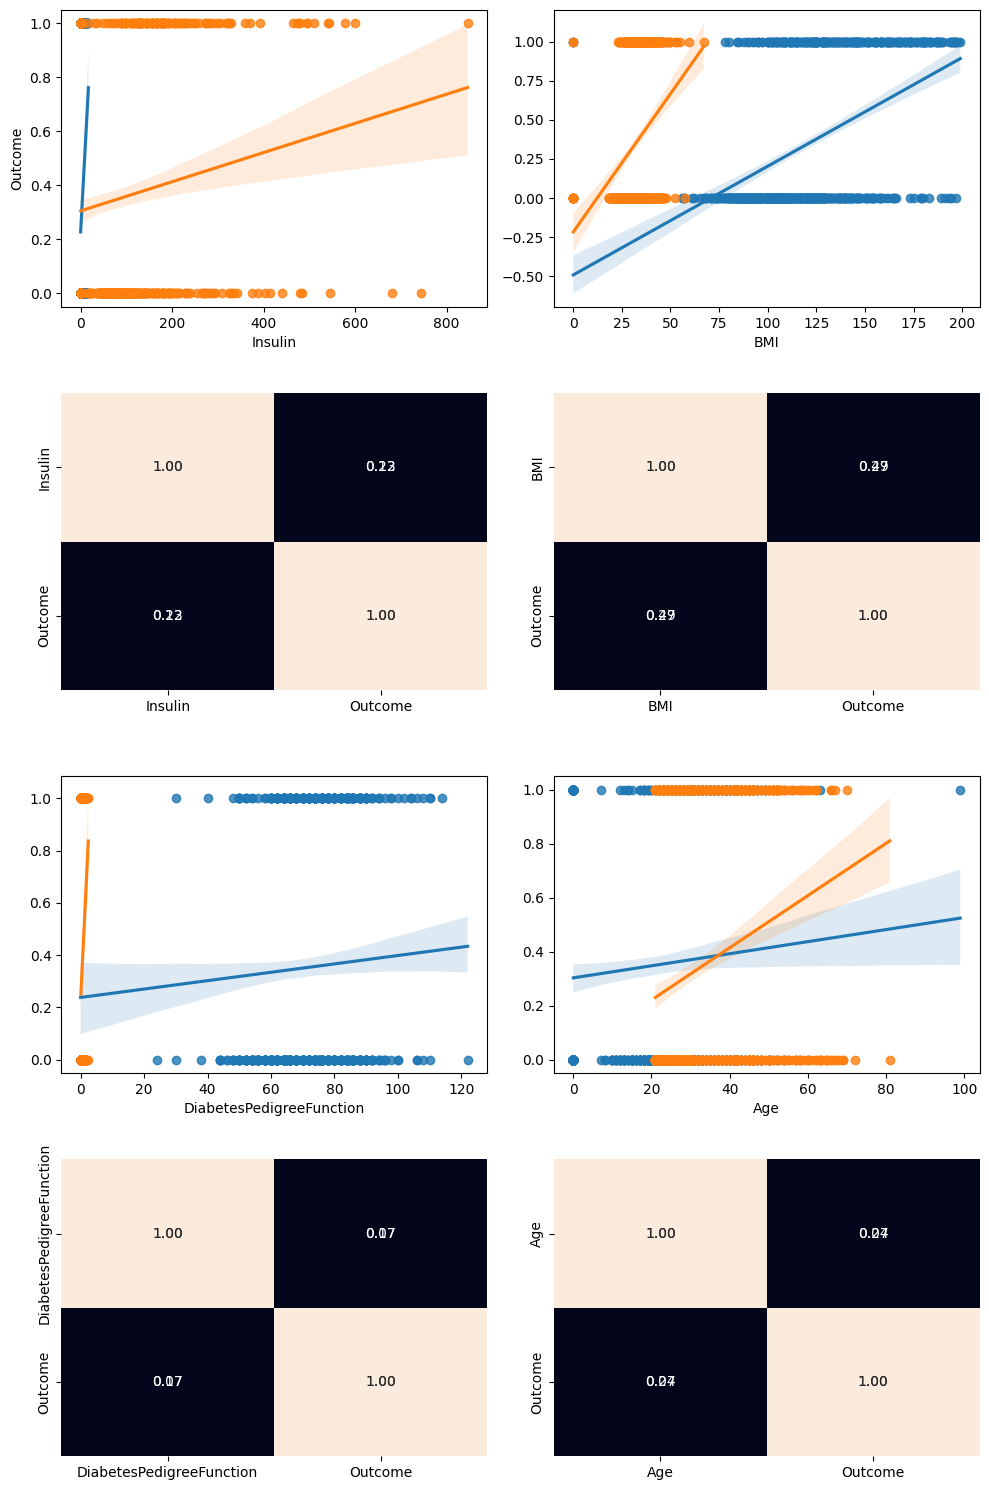

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axis = plt.subplots(4, 2, figsize=(10, 15))

# Create a multiple scatter diagram and heatmap for each feature
sns.regplot(ax=axis[0, 0], data=total_data, x="Pregnancies", y="Outcome")
sns.heatmap(total_data[["Pregnancies", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(ax=axis[0, 1], data=total_data, x="Glucose", y="Outcome").set(ylabel=None)
sns.heatmap(total_data[["Glucose", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

sns.regplot(ax=axis[2, 0], data=total_data, x="BloodPressure", y="Outcome").set(ylabel=None)
sns.heatmap(total_data[["BloodPressure", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cbar=False)

sns.regplot(ax=axis[2, 1], data=total_data, x="SkinThickness", y="Outcome").set(ylabel=None)
sns.heatmap(total_data[["SkinThickness", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

sns.regplot(ax=axis[0, 0], data=total_data, x="Insulin", y="Outcome")
sns.heatmap(total_data[["Insulin", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(ax=axis[0, 1], data=total_data, x="BMI", y="Outcome").set(ylabel=None)
sns.heatmap(total_data[["BMI", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

sns.regplot(ax=axis[2, 0], data=total_data, x="DiabetesPedigreeFunction", y="Outcome").set(ylabel=None)
sns.heatmap(total_data[["DiabetesPedigreeFunction", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cbar=False)

sns.regplot(ax=axis[2, 1], data=total_data, x="Age", y="Outcome").set(ylabel=None)
sns.heatmap(total_data[["Age", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


<Axes: >

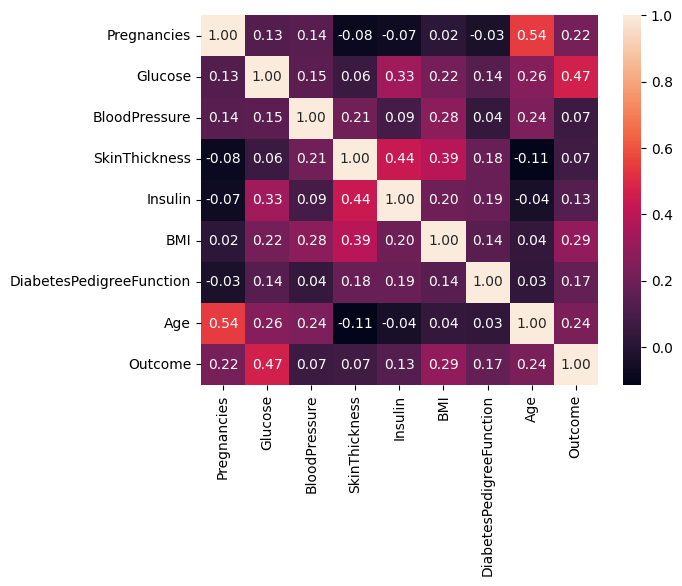

In [8]:
sns.heatmap(total_data.corr(), annot = True, fmt = ".2f")

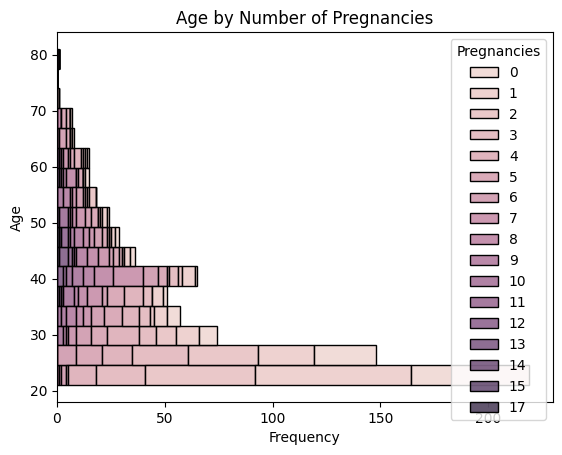

In [9]:

# Create the histogram
sns.histplot(data=total_data, y='Age', hue='Pregnancies', multiple='stack')

# Add title and labels
plt.title('Age by Number of Pregnancies')
plt.xlabel('Frequency')
plt.ylabel('Age')

# Show the plot
plt.show()


**Analyisis:**

We can see there are quite a few notsble correlations, however not all will prove of use.

*(Prenancies vs Age: strong correlation, but irrelevant)*
1. Positive Notable Correlations (vs Outcome):
- Glucose: Moderate to strong correlation (0.47) with diabetes.
- BMI: Moderate correlation (0.29) with diabetes.
- Age: Moderate correlation (0.24) with diabetes.
- Pregnancies: Slight correlation (0.22) with diabetes.

2. Weak Correlation (vs Outcome):
- Insulin (surprisingly): Weak correlation (0.13) with diabetes.

Variables such as 'BloodPressure', 'SkinThickness', and 'DiabetesPedigreeFunction' do not show notable correlations with diabetes outcome.

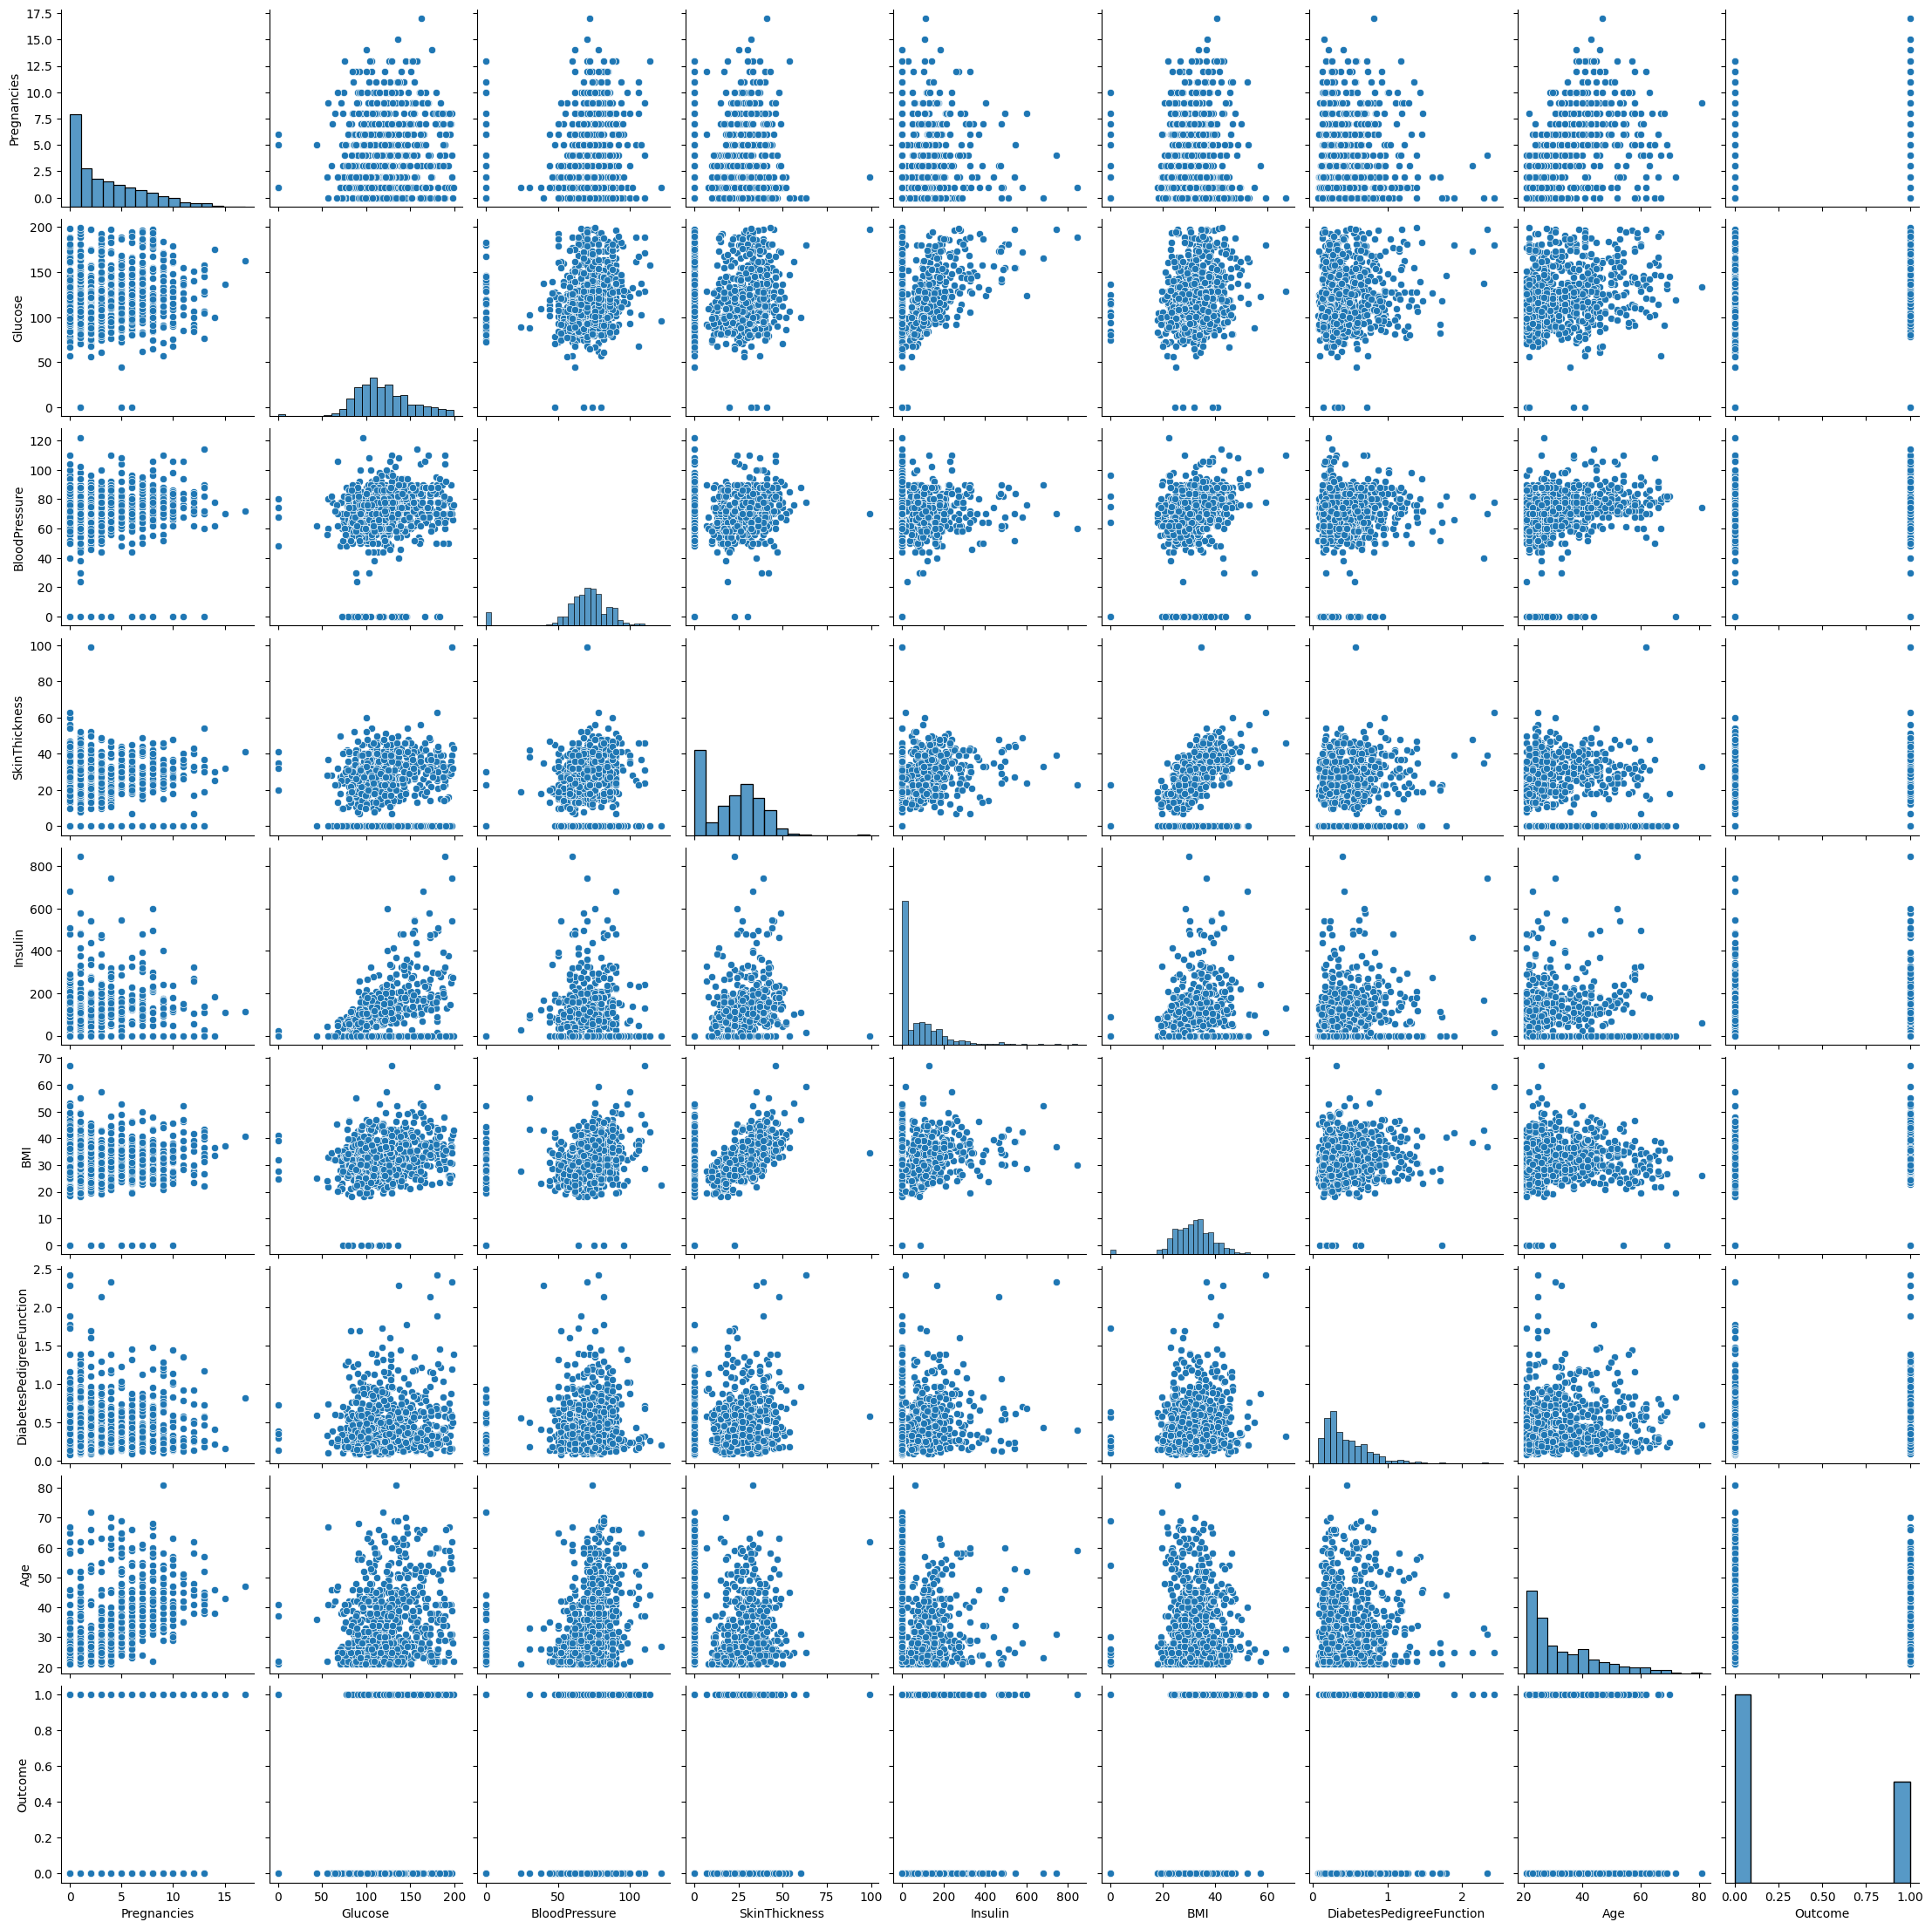

In [10]:
sns.pairplot(data = total_data)

In [11]:
total_data.describe().loc[['mean', 'min', '25%', '75%', 'max']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
zero_counts = (total_data == 0).sum()

# Display the counts of zero values for each column
print("Number of zero values in each column:")
print(zero_counts)

Number of zero values in each column:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Zero Values Analysis (relevant params):
- Relevant Correlation (Glucose (5) / Insulin (374) / BMI (11)): given only glucose seems to be of high correltion, but moreover how interdependent these correlations are, it would be a mistake to impute these values with the mean. So, despite indication that these may be replacements for missing data, it would be unwise to change them.
- Irrelevant Correlation (BloodPressure (35) / Skin Thickness (227)) : these play very little role in the grand scheme of things and are inches away from being completely removed as parameters, so we leave them be.

notes:
no scaling/ normalization needed for this model



In [13]:
from sklearn.model_selection import train_test_split

X = total_data.drop("Outcome", axis = 1)
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
y_train.mean(), y_test.mean()

(0.3469055374592834, 0.35714285714285715)

Feature Selection

In [16]:
from sklearn.feature_selection import f_classif, SelectKBest


selection_model = SelectKBest(f_classif, k = 6)
selection_model.fit(X_train, y_train)

SelectKBest(k=6)

In [17]:
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

In [18]:
X_train_sel

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.304,21.0
1,9.0,112.0,0.0,28.2,1.282,50.0
2,1.0,139.0,83.0,28.7,0.654,22.0
3,0.0,161.0,0.0,21.9,0.254,65.0
4,6.0,134.0,370.0,46.2,0.238,46.0
...,...,...,...,...,...,...
609,5.0,139.0,140.0,28.6,0.411,26.0
610,1.0,96.0,0.0,22.4,0.207,27.0
611,10.0,101.0,0.0,45.6,1.136,38.0
612,0.0,141.0,0.0,42.4,0.205,29.0


In [19]:
X_test_sel

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,190.0,34.0,0.430,43.0
1,2.0,112.0,0.0,35.7,0.148,21.0
2,2.0,108.0,0.0,30.8,0.158,21.0
3,8.0,107.0,0.0,24.6,0.856,34.0
4,7.0,136.0,0.0,29.9,0.210,50.0
...,...,...,...,...,...,...
149,9.0,165.0,0.0,30.4,0.302,49.0
150,1.0,77.0,56.0,33.3,1.251,24.0
151,8.0,95.0,0.0,36.8,0.485,57.0
152,2.0,146.0,360.0,28.0,0.337,29.0


In [20]:
dict(zip(X_train.columns,selection_model.scores_))

{'Pregnancies': 27.55000099428329,
 'Glucose': 160.76903011068106,
 'BloodPressure': 4.1476081243507315,
 'SkinThickness': 2.059429284430796,
 'Insulin': 7.290108456568085,
 'BMI': 63.37841371737244,
 'DiabetesPedigreeFunction': 14.977703966515802,
 'Age': 52.32695139871558}

In [44]:
X_train_sel['Outcome'] = list(y_train)
X_test_sel['Outcome'] = list(y_test)


X_train_sel.to_csv("../data/processed/clean_train.csv")
X_test_sel.to_csv("../data/processed/clean_test.csv")

### Decision Tree

In [45]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Unnamed: 0,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,2.0,84.0,0.0,0.0,0.304,21.0,0
1,1,9.0,112.0,0.0,28.2,1.282,50.0,1
2,2,1.0,139.0,83.0,28.7,0.654,22.0,0
3,3,0.0,161.0,0.0,21.9,0.254,65.0,0
4,4,6.0,134.0,370.0,46.2,0.238,46.0,1


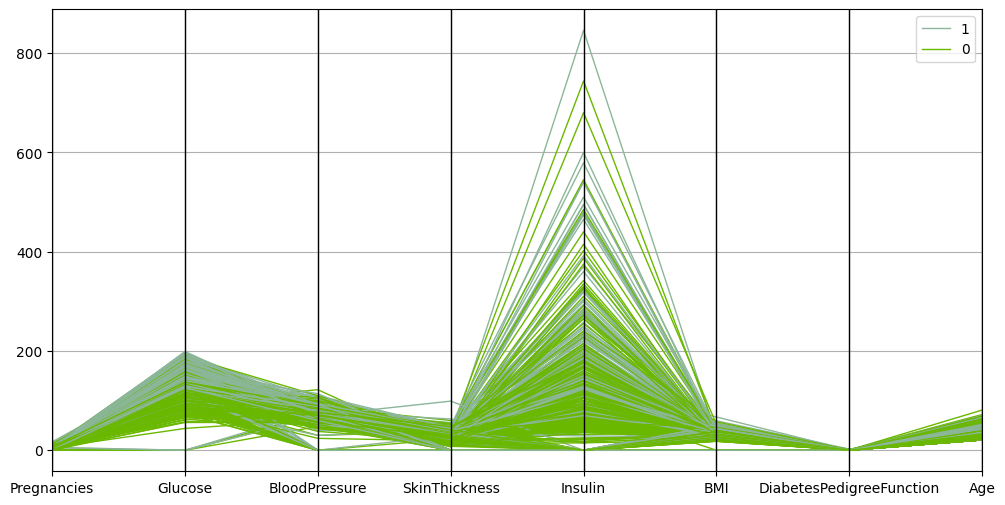

In [64]:

colors = ['#E58139', '#39E581', '#8139E5']
plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(total_data, "Outcome", linewidth=1)

# Show the plot
plt.show()


In [46]:
X_train = train_data.drop(["Unnamed: 0", "Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Unnamed: 0", "Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [28]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state= 42)

In [29]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [47]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [48]:
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[69 30]
 [14 41]]
              precision    recall  f1-score   support

           0       0.83      0.70      0.76        99
           1       0.58      0.75      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.72       154



In [50]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [52]:
features = pd.DataFrame(model.feature_importances_, index = X_train.columns)
features.head(8)

,0
Pregnancies,0.052084
Glucose,0.343061
Insulin,0.070736
BMI,0.234727
DiabetesPedigreeFunction,0.138343
Age,0.161048


Hyperparameter Tuning

In [53]:
import numpy as np
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter ranges using np.linspace
param_grid = {
    'max_depth': np.linspace(1, 20, 20, dtype=int), 
    'min_samples_split': np.linspace(2, 20, 10, dtype=int),  
    'min_samples_leaf': np.linspace(1, 10, 10, dtype=int),  
    'max_features': ['sqrt', 'log2'],  
    'criterion': ['gini', 'entropy']  
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 12}
Test Accuracy: 0.6883116883116883


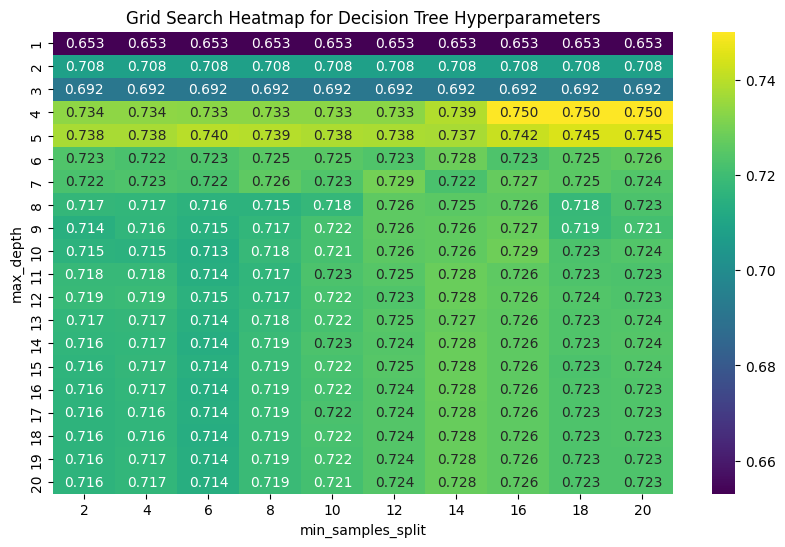

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract hyperparameters and scores from the grid search results
params = grid_search.cv_results_['params']
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Create a DataFrame to store the results
results_df = pd.DataFrame(params)
results_df['mean_test_score'] = mean_test_scores

# Create a pivot table for better visualization
pivot_table = results_df.pivot_table(index='max_depth', columns='min_samples_split', values='mean_test_score')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".3f")
plt.title('Grid Search Heatmap for Decision Tree Hyperparameters')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.show()


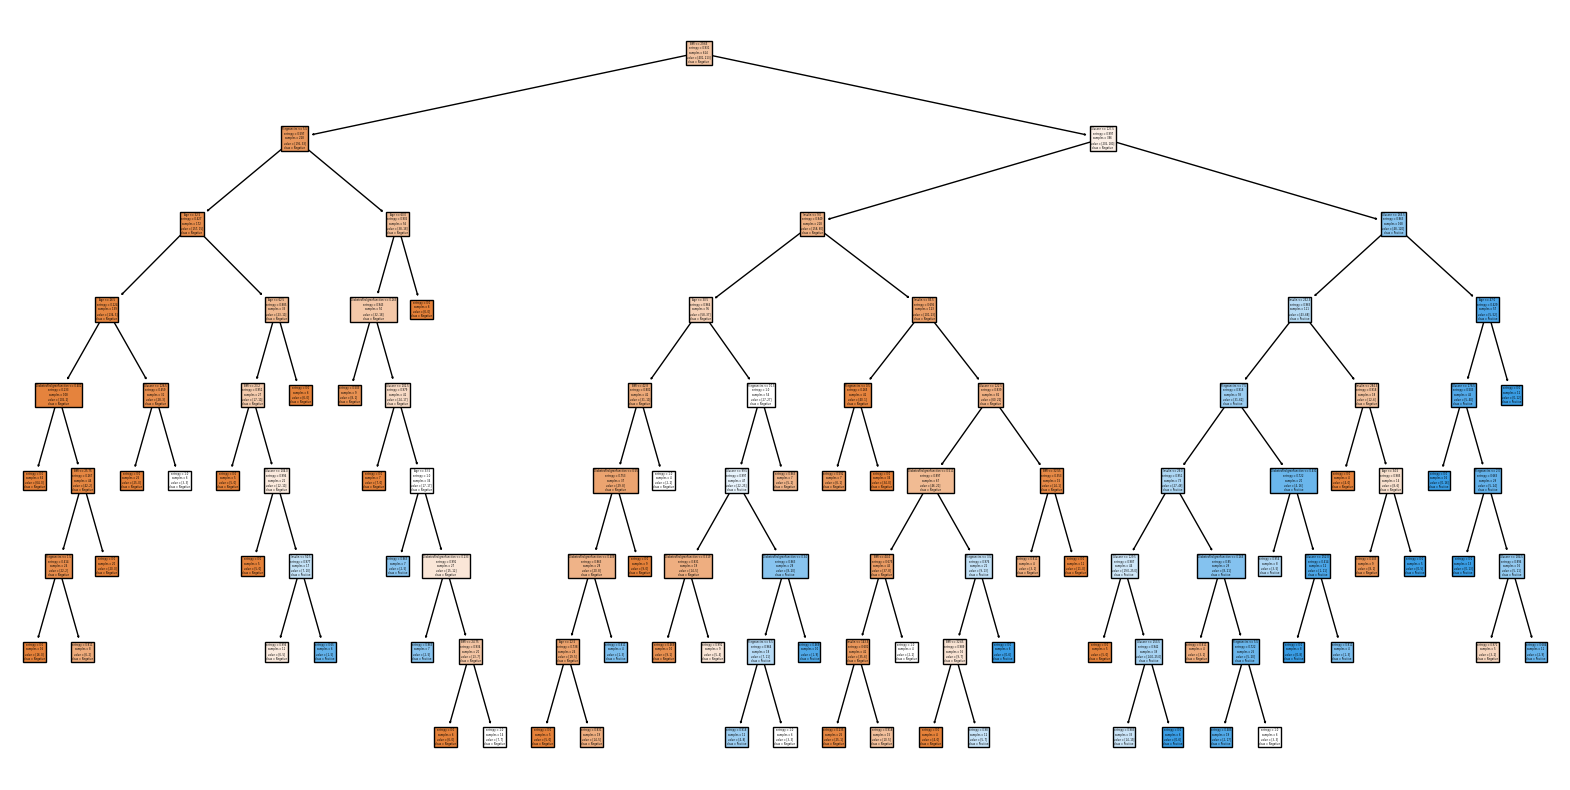

In [58]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

best_dt_model = grid_search.best_estimator_

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_dt_model, feature_names=X_train.columns, class_names=['Negative', 'Positive'], filled=True)
plt.show()


In [59]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7142857142857143